# **Housing Sales Prices & Venues in Jabodetabek**
--------

This study is inspired by Sercan Yildiz [House Sales Prices and Venues in Istanbul](https://towardsdatascience.com/housing-sales-prices-venues-in-istanbul-dbdefb8b06f0) article, thank you so much Sercan !!!

## **A. Introduction**

#### **A.1. Description & Disscusion of the Background**

Jakarta is the capital and largest city of Indonesia. Situated on the northwest coast of the world's most populous island of Java, it is the centre of economy, culture and politics of Indonesia with a population of more than ten million as of 2014. Albeit only covers 699.5 square kilometres, the smallest among any Indonesian provinces, its metropolitan area covers 6,392 square kilometres; it is the world's second most populous urban area after Tokyo, with a population of about 30 million as of 2010. Jakarta's business opportunities, as well as its potential to offer a higher standard of living, have attracted migrants from across the Indonesian archipelago, making it a melting pot of numerous cultures. The city proper has a very high population density of 14,464 people per square kilometer, while the metro area has a density of 4,383 people/sq km. [1]

Not only Jakarta residents, Jakarta is filled with workers from outside Jakarta every day, so it is often called Jabodetabek (Jakarta, Bogor, Depok, Tangerang, Bekasi) or Greater Jakarta area. Lots of public transportation makes it easy for these workers to go to Jakarta even though the distance is quite far adrift. Therefore, there are a lot of investors who have started investing in the Jabodetabek area, and this study will try to explore parts of Jabodetabek related to relatively low property prices with low intensity of business competition. 

When we consider all of these problems, we can create a map and information chart where the house price index is placed on Jabodetabek and each district is clustered according to the venue density.

#### **A.2. Data Description**

To consider the problem we can list the datas as belows

* I used **Forsquare API** to get the most common venues of given cities of Jabodetabek [2].
* There are not too many public datas related to demographic and social parameters for the cities of Jabodetabek. Therefore you must set-up your own data tables in most cases. In this case, I collected latest House Price Averages for each Cities of Jabodetabek from housing retail web page [3].

## **B. Methodology**
----

#### **B.1. Creating data table and data pre-processing**

My master data **df** which has the main components *Cities*, and *Average House Price* informations of the cities.

In [6]:
import pandas as pd 
import numpy as np
import requests
pd.options.display.float_format = '{:,}'.format
import warnings
warnings.filterwarnings('ignore')

url = 'https://raw.githubusercontent.com/havezalkautsar/Jabodetabek-Capstone-Project/master/House%20Pricing%20Data%20in%20Indonesia%20Big%20Cities%20-%20Oct%202019.csv'

df = pd.read_csv(url, delimiter = ";", thousands=r',')

df

,City,Price (Rp/m2)
0,Central Jakarta,26997450
1,North Jakarta,25199166
2,South Jakarta,22044101
3,West Jakarta,17971174
4,East Jakarta,13004566
5,Tangerang,10498210
6,Bekasi,5953004
7,Depok,6584794
8,Bogor,5811302
9,Bandung,6850786


#### **B.2. Visual Map & Clustering in City**

We need to import some external libraries for mapping and clustering of the datas and we will work on Forsquare API part, as well. 

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


#### We will use folium library to visualize geographic details of Jabodetabek and its cities.

In [4]:
# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# !conda install -c conda-forge folium=0.7.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#### I use geopy library to get the latitude and longitude values of Jabodetabek

In [8]:
cities = df['City'].unique().tolist()

latlong_cities = []
for i in cities:
    address = '{}, Indonesia'.format(i)
    print(address)

    geolocator = Nominatim()
    location = geolocator.geocode(address)
    if location is not None:
        latitude = location.latitude
        longitude = location.longitude
    else:
        latitude = None
        longitude = None
    latlong_cities.append([i] + [latitude] + [longitude])

    print('The geographical coordinate of {} are {}, {}.'.format(i, latitude, longitude))

Central Jakarta, Indonesia
The geographical coordinate of Central Jakarta are -6.18233995, 106.84287153600738.
North Jakarta, Indonesia
The geographical coordinate of North Jakarta are -6.1362053, 106.90069097114528.
South Jakarta, Indonesia
The geographical coordinate of South Jakarta are -6.28381815, 106.80486349194814.
West Jakarta, Indonesia
The geographical coordinate of West Jakarta are -6.16156235, 106.74389124027667.
East Jakarta, Indonesia
The geographical coordinate of East Jakarta are -6.26289085, 106.88222894692834.
Tangerang, Indonesia
The geographical coordinate of Tangerang are -6.1734808, 106.4992042.
Bekasi, Indonesia
The geographical coordinate of Bekasi are -6.2349858, 106.9945444.
Depok, Indonesia
The geographical coordinate of Depok are -6.4074657, 106.8138131.
Bogor, Indonesia
The geographical coordinate of Bogor are -6.5962986, 106.7972421.
Bandung, Indonesia
The geographical coordinate of Bandung are -6.9344694, 107.6049539.
Denpasar, Indonesia
The geographical 

In [9]:
jabodetabek = pd.DataFrame(latlong_cities[:9], columns=['city', 'latitude', 'longitude'])

jabodetabek = df.merge(jabodetabek, how='inner', left_on=['City'], right_on=['city'])
jabodetabek.drop('city', axis=1, inplace=True)
jabodetabek.columns = jabodetabek.columns.str.lower()
jabodetabek

,city,price (rp/m2),latitude,longitude
0,Central Jakarta,26997450,-6.18233995,106.84287153600738
1,North Jakarta,25199166,-6.1362053,106.90069097114528
2,South Jakarta,22044101,-6.28381815,106.80486349194814
3,West Jakarta,17971174,-6.16156235,106.74389124027667
4,East Jakarta,13004566,-6.26289085,106.88222894692834
5,Tangerang,10498210,-6.1734808,106.4992042
6,Bekasi,5953004,-6.2349858,106.9945444
7,Depok,6584794,-6.4074657,106.8138131
8,Bogor,5811302,-6.5962986,106.7972421


#### We can create a map of Jabodetabek with cities superimposed on top. We use latitude and longitude values to get the visual

In [10]:
latitude = jabodetabek.loc[jabodetabek['city'] == 'Central Jakarta', 'latitude']
longitude = jabodetabek.loc[jabodetabek['city'] == 'Central Jakarta', 'longitude']

map_jabodetabek = folium.Map(location=[latitude, longitude])

# add markers to map
for lat, lng, city in zip(jabodetabek['latitude'], jabodetabek['longitude'], jabodetabek['city']):
    label = '{}'.format(city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_jabodetabek)  
    
display(map_jabodetabek)

#### Let's utilizing the Foursquare API to explore the cities and segment them.

In [225]:
CLIENT_ID = '' # my Foursquare ID
CLIENT_SECRET = '' # my Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


#### We will get the city's latitude and longitude values.

In [28]:
city_latitude = jabodetabek.loc[0, 'latitude'] # neighborhood latitude value
city_longitude = jabodetabek.loc[0, 'longitude'] # neighborhood longitude value

city_name = jabodetabek.loc[0, 'city'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(city_name, 
                                                               city_latitude, 
                                                               city_longitude))

Latitude and longitude values of Central Jakarta are -6.18233995, 106.84287153600738.


First, let's create the GET request URL. Name your URL url. I design the limit as 100 venue and the radius 750 meter for each city

In [227]:
LIMIT = 1000
radius = 3000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    city_latitude, 
    city_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=&client_secret=&v=20180605&ll=-6.18233995,106.84287153600738&radius=3000&limit=1000'

In [226]:
results = requests.get(url).json()

From the Foursquare lab, we know that all the information is in the items key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [32]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe

In [36]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,"Es Krim Baltic, Ice Cream Tempo Doeloe, Senen",Ice Cream Shop,-6.179410,106.842062
1,Nasi Kapau Sabana Asli,Padangnese Restaurant,-6.179446,106.842497
2,Starbucks,Coffee Shop,-6.187875,106.836585
3,Pasar Senen Blok III,Miscellaneous Shop,-6.175573,106.842996
4,Bunga Pepaya,Manadonese Restaurant,-6.189087,106.835859


And how many venues were returned by Foursquare?

In [37]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


#### **B.3. Exploring Cities in Jabodetabek**

Let's create a function to get all the cities in Jabodetabek

In [63]:
def getNearbyVenues(names, latitudes, longitudes, radius=10000, LIMIT=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now we can run the above function on each city and create a new dataframe called **Jabodetabek_venues**

In [64]:
jabodetabek_venues = getNearbyVenues(names=jabodetabek['city'],
                                   latitudes=jabodetabek['latitude'],
                                   longitudes=jabodetabek['longitude']
                                  )

Central Jakarta
North Jakarta
South Jakarta
West Jakarta
East Jakarta
Tangerang
Bekasi
Depok
Bogor


#### Let's check the size of the resulting dataframe

In [66]:
print(jabodetabek_venues.shape)
jabodetabek_venues.head()

(851, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central Jakarta,-6.18234,106.842872,Bunga Pepaya,-6.189087,106.835859,Manadonese Restaurant
1,Central Jakarta,-6.18234,106.842872,Starbucks,-6.187875,106.836585,Coffee Shop
2,Central Jakarta,-6.18234,106.842872,Mercure Jakarta Cikini,-6.194325,106.839137,Hotel
3,Central Jakarta,-6.18234,106.842872,DoubleTree by Hilton,-6.198763,106.843126,Hotel
4,Central Jakarta,-6.18234,106.842872,The Hermitage,-6.198318,106.838120,Hotel


#### Let's check how many venues were returned for each city and sort them in count

In [67]:
summary = jabodetabek_venues.groupby('City').count().reset_index()
summary['Count'] = summary['Venue']
summary = summary.drop(['City Latitude', 'City Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category'], axis=1)
summary = summary.sort_values('Count').reset_index(drop=True)
summary

,City,Count
0,Tangerang,51
1,Bekasi,100
2,Bogor,100
3,Central Jakarta,100
4,Depok,100
5,East Jakarta,100
6,North Jakarta,100
7,South Jakarta,100
8,West Jakarta,100


#### We can create a bar chart and analyze the big picture of it

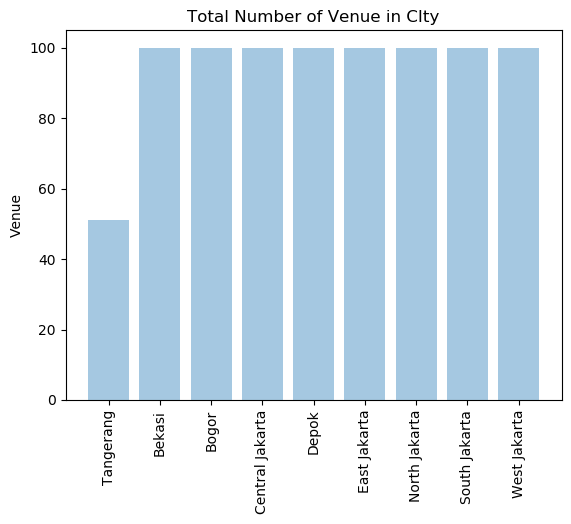

In [68]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = summary.City
y_pos = np.arange(len(objects))
performance = summary.Count

plt.bar(y_pos, performance, align='center', alpha=0.4)
plt.xticks(y_pos, objects)
plt.ylabel('Venue')
plt.title('Total Number of Venue in CIty')
plt.xticks(rotation=90)

plt.show()

Here is we can see that 8 of 9 cities reached the **100** limit of venues. On the other hand; Tangerang is below **60** venues in our given coordinates with Latitude and Longitude.

The result doesn't mean that inquiry run all the possible results in cities. Actually, it depends on given Latitude and Longitude informations and here is we just run single Latitude and Longitude pair for each city. We can increase the possibilities with Neighborhood informations with more Latitude and Longitude informations.

Let's find out how many unique categories can be curated from all the returned venues

In [69]:
print('There are {} uniques categories.'.format(len(jabodetabek_venues['Venue Category'].unique())))

There are 144 uniques categories.


#### **B.4. Analyzing Each City**

We will anayze each city with venues informations

In [73]:
# one hot encoding
jabodetabek_onehot = pd.get_dummies(jabodetabek_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
jabodetabek_onehot['City'] = jabodetabek_venues['City'] 

# move neighborhood column to the first column
list_column = jabodetabek_onehot.columns.tolist()
number_column = int(list_column.index('City'))
list_column = [list_column[number_column]] + list_column[:number_column] + list_column[number_column+1:] 
jabodetabek_onehot = jabodetabek_onehot[list_column]

jabodetabek_onehot.head()

,City,African Restaurant,American Restaurant,Aquarium,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Balinese Restaurant,Bar,Beach,Betawinese Restaurant,Bistro,Board Shop,Bookstore,Botanical Garden,Breakfast Spot,Bubble Tea Shop,Buffet,Burger Joint,Butcher,Café,Chinese Restaurant,Church,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Creperie,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Electronics Store,Event Space,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flea Market,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,General Entertainment,German Restaurant,Golf Course,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Hardware Store,History Museum,Hostel,Hotel,Housing Development,Ice Cream Shop,Indonesian Meatball Place,Indonesian Restaurant,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Javanese Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lounge,Mac & Cheese Joint,Manadonese Restaurant,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nightclub,Noodle House,Padangnese Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pool Hall,Public Art,Restaurant,Road,Salon / Barbershop,Sandwich Place,Satay Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soup Place,Spa,Spanish Restaurant,Sports Bar,Stables,Steakhouse,Sundanese Restaurant,Supermarket,Surf Spot,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Travel Agency,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Wine Bar,Wings Joint,Yoga Studio
0,Central Jakarta,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Central Jakarta,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Central Jakarta,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Central Jakarta,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Central Jakarta,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Next, let's group rows by city and by taking the mean of the frequency of occurrence of each category

In [75]:
jabodetabek_grouped = jabodetabek_onehot.groupby('City').mean().reset_index()
jabodetabek_grouped

,City,African Restaurant,American Restaurant,Aquarium,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Balinese Restaurant,Bar,Beach,Betawinese Restaurant,Bistro,Board Shop,Bookstore,Botanical Garden,Breakfast Spot,Bubble Tea Shop,Buffet,Burger Joint,Butcher,Café,Chinese Restaurant,Church,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Creperie,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Electronics Store,Event Space,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flea Market,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,General Entertainment,German Restaurant,Golf Course,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Hardware Store,History Museum,Hostel,Hotel,Housing Development,Ice Cream Shop,Indonesian Meatball Place,Indonesian Restaurant,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Javanese Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lounge,Mac & Cheese Joint,Manadonese Restaurant,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nightclub,Noodle House,Padangnese Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pool Hall,Public Art,Restaurant,Road,Salon / Barbershop,Sandwich Place,Satay Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soup Place,Spa,Spanish Restaurant,Sports Bar,Stables,Steakhouse,Sundanese Restaurant,Supermarket,Surf Spot,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Travel Agency,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Wine Bar,Wings Joint,Yoga Studio
0,Bekasi,0.00,0.00,0.00,0.000000,0.00,0.050000,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.010000,0.00,0.01,0.00,0.02,0.020000,0.00,0.01,0.070000,0.00,0.00,0.010000,0.00,0.00,0.03,0.02,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.060000,0.00,0.00,0.01,0.02,0.010000,0.00,0.01,0.03,0.010000,0.00,0.00,0.00,0.00,0.000000,0.030000,0.00,0.00,0.00,0.01,0.00,0.00,0.03,0.000000,0.01,0.02,0.080000,0.00,0.00,0.010000,0.000000,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.010000,0.01,0.00,0.00,0.00,0.000000,0.00,0.00,0.03,0.040000,0.00,0.00,0.01,0.000000,0.020000,0.01,0.01,0.00,0.00,0.00,0.00,0.020000,0.000000,0.00,0.020000,0.00,0.00,0.040000,0.000000,0.00,0.010000,0.00,0.030000,0.00,0.01,0.030000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.000000,0.00,0.00,0.00
1,Bogor,0.00,0.00,0.00,0.000000,0.00,0.030000,0.00,0.00,0.00,0.06,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.01,0.01,0.000000,0.00,0.00,0.00,0.05,0.020000,0.00,0.00,0.110000,0.00,0.00,0.010000,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.000000,0.02,0.030000,0.01,0.00,0.00,0.00,0.020000,0.00,0.01,0.00,0.000000,0.00,0.00,0.00,0.00,0.010000,0.000000,0.00,0.01,0.01,0.01,0.00,0.00,0.08,0.000000,0.02,0.01,0.080000,0.00,0.02,0.010000,0.000000,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.010000,0.00,0.00,0.00,0.01,0.000000,0.00,0.00,0.01,0.020000,0.00,0.00,0.01,0.000000,0.050000,0.00,0.00,0.00,0.00,0.00,0.00,0.020000,0.000000,0.00,0.020000,0.00,0.00,0.040000,0.000000,0.00,0.000000,0.00,0.020000,0.01,0.00,0.000000,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.000000,0.00,0.01,0.00
2,Central Jakarta,0.00,0.00,0.00,0.000000,0.00,0.020000,0.01,0.00,0.02,0.03,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.000000,0.02,0.00,0.00,0.01,0.010000,0.00,0.03,0.150000,0.00,0.00,0.000000,0.00,0.01,0.00,0.02,0.00,0.00,0.00,0.00,0.01,0

#### Let's put that into a pandas dataframe

First, let's write a function to sort the venues in descending order.


In [76]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [93]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
cities_venues_sorted = pd.DataFrame(columns=columns)
cities_venues_sorted['City'] = jabodetabek_grouped['City']

for ind in np.arange(jabodetabek_grouped.shape[0]):
    cities_venues_sorted.iloc[ind, 1:] = return_most_common_venues(jabodetabek_grouped.iloc[ind, :], num_top_venues)

cities_venues_sorted

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bekasi,Indonesian Restaurant,Coffee Shop,Fast Food Restaurant,Asian Restaurant,Restaurant,Multiplex,Seafood Restaurant,Shopping Mall,Department Store,Movie Theater
1,Bogor,Coffee Shop,Hotel,Indonesian Restaurant,Bakery,Café,Noodle House,Restaurant,Fast Food Restaurant,Asian Restaurant,Seafood Restaurant
2,Central Jakarta,Coffee Shop,Hotel,Sushi Restaurant,Restaurant,Shopping Mall,Fast Food Restaurant,Clothing Store,Bakery,Javanese Restaurant,Dessert Shop
3,Depok,Indonesian Restaurant,Coffee Shop,Food Truck,Fast Food Restaurant,Café,Bakery,Snack Place,Golf Course,Pizza Place,Seafood Restaurant
4,East Jakarta,Coffee Shop,Hotel,Fast Food Restaurant,Restaurant,Indonesian Restaurant,Padangnese Restaurant,Bakery,Sushi Restaurant,Steakhouse,Ice Cream Shop
5,North Jakarta,Coffee Shop,Indonesian Restaurant,Noodle House,Asian Restaurant,Chinese Restaurant,Shopping Mall,Multiplex,Beach,Restaurant,Bakery
6,South Jakarta,Coffee Shop,Hotel,Indonesian Restaurant,Bakery,Shabu-Shabu Restaurant,Restaurant,Steakhouse,Padangnese Restaurant,Asian Restaurant,Motorcycle Shop
7,Tangerang,Indonesian Restaurant,Asian Restaurant,Convenience Store,Fast Food Restaurant,Coffee Shop,Furniture / Home Store,Pool,Japanese Restaurant,Nightclub,Seafood Restaurant
8,West Jakarta,Coffee Shop,Seafood Restaurant,Indonesian Restaurant,Asian Restaurant,Korean Restaurant,Sushi Restaurant,Chinese Restaurant,Café,Pizza Place,Shopping Mall


#### **B.5. Cluster of Cities**

K-Means algorithm is one of the most common cluster method of **unsupervised learning**. I will use K-Means algorithm for my study in this project.

I use the elbow method to gain the proper k for clustering.

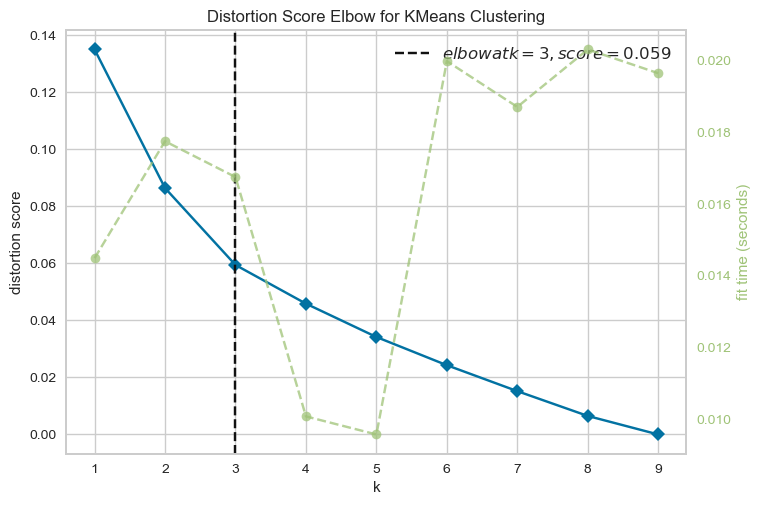

In [138]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# !pip install yellowbrick 
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Generate synthetic dataset with 8 random clusters
# X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(jabodetabek_grouped_clustering)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Based on the figure above, I will run K-Means to cluster the cities into 3 clusters.

In [94]:
# set number of clusters
kclusters = 3

jabodetabek_grouped_clustering = jabodetabek_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(jabodetabek_grouped_clustering)

# check cluster labels generated for each row in the dataframe
labels = kmeans.labels_
labels

array([2, 2, 0, 2, 0, 2, 0, 1, 2])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [172]:
jabodetabek_merged = jabodetabek

# add clustering labels
jabodetabek_merged['Cluster Labels'] = kmeans.labels_
jabodetabek_merged.rename(columns = {'city':'City'}, inplace = True)

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
jabodetabek_merged = jabodetabek_merged.join(cities_venues_sorted.set_index('City'), on = 'City')

jabodetabek_merged # check the last columns!

,City,price (rp/m2),latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Jakarta,26997450,-6.18233995,106.84287153600738,2,Coffee Shop,Hotel,Sushi Restaurant,Restaurant,Shopping Mall,Fast Food Restaurant,Clothing Store,Bakery,Javanese Restaurant,Dessert Shop
1,North Jakarta,25199166,-6.1362053,106.90069097114528,2,Coffee Shop,Indonesian Restaurant,Noodle House,Asian Restaurant,Chinese Restaurant,Shopping Mall,Multiplex,Beach,Restaurant,Bakery
2,South Jakarta,22044101,-6.28381815,106.80486349194814,0,Coffee Shop,Hotel,Indonesian Restaurant,Bakery,Shabu-Shabu Restaurant,Restaurant,Steakhouse,Padangnese Restaurant,Asian Restaurant,Motorcycle Shop
3,West Jakarta,17971174,-6.16156235,106.74389124027667,2,Coffee Shop,Seafood Restaurant,Indonesian Restaurant,Asian Restaurant,Korean Restaurant,Sushi Restaurant,Chinese Restaurant,Café,Pizza Place,Shopping Mall
4,East Jakarta,13004566,-6.26289085,106.88222894692834,0,Coffee Shop,Hotel,Fast Food Restaurant,Restaurant,Indonesian Restaurant,Padangnese Restaurant,Bakery,Sushi Restaurant,Steakhouse,Ice Cream Shop
5,Tangerang,10498210,-6.1734808,106.4992042,2,Indonesian Restaurant,Asian Restaurant,Convenience Store,Fast Food Restaurant,Coffee Shop,Furniture / Home Store,Pool,Japanese Restaurant,Nightclub,Seafood Restaurant
6,Bekasi,5953004,-6.2349858,106.9945444,0,Indonesian Restaurant,Coffee Shop,Fast Food Restaurant,Asian Restaurant,Restaurant,Multiplex,Seafood Restaurant,Shopping Mall,Department Store,Movie Theater
7,Depok,6584794,-6.4074657,106.8138131,1,Indonesian Restaurant,Coffee Shop,Food Truck,Fast Food Restaurant,Café,Bakery,Snack Place,Golf Course,Pizza Place,Seafood Restaurant
8,Bogor,5811302,-6.5962986,106.7972421,2,Coffee Shop,Hotel,Indonesian Restaurant,Bakery,Café,Noodle House,Restaurant,Fast Food Restaurant,Asian Restaurant,Seafood Restaurant


We can also estimate the number of **1st Most Common Venue** in each cluster.Thus, we can create a bar chart which may help us to find proper label names for each cluster.

In [150]:
count_venue = jabodetabek_merged
count_venue = count_venue.drop(['City','price (rp/m2)', 'latitude', 'latitude'], axis=1)
count_venue = count_venue.groupby(['Cluster Labels','1st Most Common Venue']).size().reset_index(name='Counts')

#we can transpose it to plot bar chart
cv_cluster = count_venue.pivot(index='Cluster Labels', columns='1st Most Common Venue', values='Counts')
cv_cluster = cv_cluster.fillna(0).astype(int).reset_index(drop=True)
cv_cluster

1st Most Common Venue,Coffee Shop,Indonesian Restaurant
0,2,1
1,0,1
2,4,1


Text(0, 0.5, 'Number of Venues')

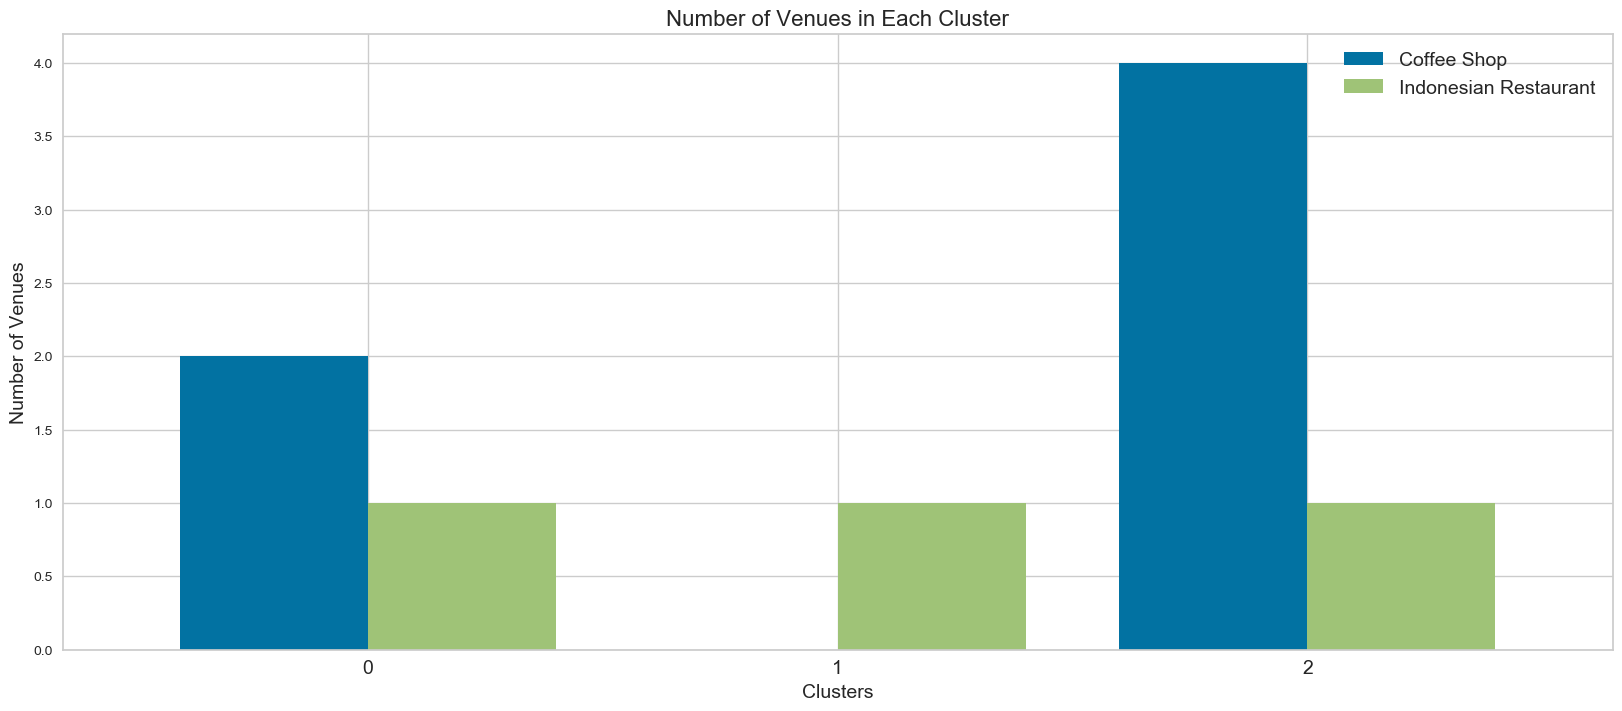

In [152]:
#creating a bar chart of "Number of Venues in Each Cluster"
frame=cv_cluster.plot(kind='bar',figsize=(20,8),width = 0.8)

plt.legend(labels=cv_cluster.columns,fontsize= 14)
plt.title("Number of Venues in Each Cluster",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Number of Venues', fontsize=14)

From the result above, coffee shops are very common in Jabodetabek even though it does not always in the 1st place of the most common venue but it makes at least 2nd place on Jabodetabek (coffee shop in cluster 1 is in the 2nd place of the most common venue).

When we examine above graph we can label each cluster as follows:
* Cluster 0 : "Coffee Shop and Indonesian Restaurant Venues"
* Cluster 1 : "Indonesian Restaurant Venues"
* Cluster 2 : "Coffee Shop Venues"

We can now assign those new labels to existing label of clusters:

In [154]:
Cluster_labels = {'Clusters': [0,1,2], 'Labels': ["Coffee Shop and Indonesian Restaurant Venues","Indonesian Restaurant Venues","Coffee Shop Venues"]}
Cluster_labels = pd.DataFrame(data=Cluster_labels)
Cluster_labels

,Clusters,Labels
0,0,Coffee Shop and Indonesian Restaurant Venues
1,1,Indonesian Restaurant Venues
2,2,Coffee Shop Venues


Let's analyze the housing sales prices for per square meter in specific range. Thus we can create new labels which involve pricing features, as well.

In [173]:
# jabodetabek['price (rp/m2)'].astype(str).astype(int)

data_process = jabodetabek.sort_values('price (rp/m2)').reset_index(drop=True)
data_process = data_process.drop(['latitude', 'longitude'], axis=1)
data_process

,City,price (rp/m2),Cluster Labels
0,Bogor,5811302,2
1,Bekasi,5953004,0
2,Depok,6584794,1
3,Tangerang,10498210,2
4,East Jakarta,13004566,0
5,West Jakarta,17971174,2
6,South Jakarta,22044101,0
7,North Jakarta,25199166,2
8,Central Jakarta,26997450,2


We can examine that what is the frequency of housing sales prices in different ranges. Thus, histogram can help to visualization

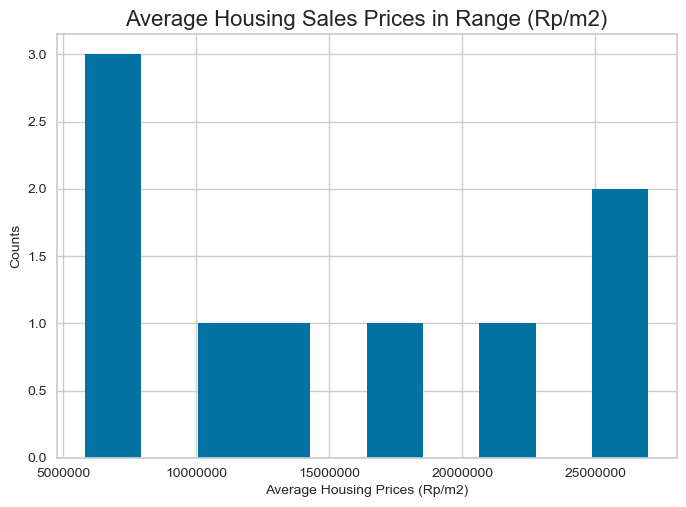

In [224]:
num_bins = 10

n, bins, patches = plt.hist(data_process['price (rp/m2)'], num_bins)
plt.title("Average Housing Sales Prices in Range (Rp/m2)",fontsize= 16)
plt.xticks(fontsize=10)
plt.xticks(rotation=0)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Average Housing Prices (Rp/m2)', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.show()

#### As it seems in above histogram, we can define the ranges as below:

* '<' 10,000,000 AHP : "Low Level HSP"
* 10,000,000 - 20,000,000 AHP : "Mid Level HSP"
* '>' 20,000,000 AHP : "High Level HSP"

In this case, we can create **"Level_labels"** with those levels.

In [205]:
level = []
for i in range(0,len(data_process)):
    if (data_process['price (rp/m2)'][i] < 10000000):
        level.append("Low Level HSP")
    elif (data_process['price (rp/m2)'][i] >= 10000000 and data_process['price (rp/m2)'][i] <= 20000000):
        level.append("Mid Level HSP")
    else:
        level.append("High Level HSP")   

data_process['Level_labels'] = level
data_process

,City,price (rp/m2),Cluster Labels,Level_labels
0,Bogor,5811302,2,Low Level HSP
1,Bekasi,5953004,0,Low Level HSP
2,Depok,6584794,1,Low Level HSP
3,Tangerang,10498210,2,Mid Level HSP
4,East Jakarta,13004566,0,Mid Level HSP
5,West Jakarta,17971174,2,Mid Level HSP
6,South Jakarta,22044101,0,High Level HSP
7,North Jakarta,25199166,2,High Level HSP
8,Central Jakarta,26997450,2,High Level HSP


One of my aim was also show the number of top 3 venues information for each city on the map. Thus, I grouped each city by the number of top 3 venues and I combined those informations in **Join** column.

In [207]:
top3 = jabodetabek_venues.groupby(['City','Venue Category']).size().reset_index(name='Counts')
top3 = top3.sort_values(['City','Counts'],ascending=False).groupby('City').head(3).reset_index(drop=True)

top3['Join'] = top3['Counts'].map(str) + " " + top3['Venue Category']
top3 = top3.groupby(['City'])['Join'].apply(", ".join).reset_index()

top3

,City,Join
0,Bekasi,"8 Indonesian Restaurant, 7 Coffee Shop, 6 Fast..."
1,Bogor,"11 Coffee Shop, 8 Hotel, 8 Indonesian Restaurant"
2,Central Jakarta,"15 Coffee Shop, 15 Hotel, 4 Sushi Restaurant"
3,Depok,"11 Indonesian Restaurant, 7 Coffee Shop, 5 Café"
4,East Jakarta,"11 Coffee Shop, 9 Hotel, 6 Fast Food Restaurant"
5,North Jakarta,"13 Coffee Shop, 7 Indonesian Restaurant, 5 Asi..."
6,South Jakarta,"7 Coffee Shop, 6 Hotel, 5 Indonesian Restaurant"
7,Tangerang,"12 Indonesian Restaurant, 4 Asian Restaurant, ..."
8,West Jakarta,"13 Coffee Shop, 6 Seafood Restaurant, 5 Indone..."


## **C. Results**

### **C.1. Main table with results**

#### Let's merge those new variables with related cluster informations in our main **Jabodetabek_merged** table.

In [208]:
import numpy as np

result = pd.merge(jabodetabek_merged, 
                    top3[['City', 'Join']],
                    left_on = 'City',
                    right_on = 'City',
                    how = 'left')
result= pd.merge(result, 
                    Cluster_labels[['Clusters', 'Labels']],
                    left_on = 'Cluster Labels',
                    right_on = 'Clusters',
                    how = 'left')
result = pd.merge(result, 
                    data_process[['City', 'Level_labels']],
                    left_on = 'City',
                    right_on = 'City',
                    how = 'left')

result = result.drop(['Clusters'], axis=1)
result

,City,price (rp/m2),latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Join,Labels,Level_labels
0,Central Jakarta,26997450,-6.18233995,106.84287153600738,2,Coffee Shop,Hotel,Sushi Restaurant,Restaurant,Shopping Mall,Fast Food Restaurant,Clothing Store,Bakery,Javanese Restaurant,Dessert Shop,"15 Coffee Shop, 15 Hotel, 4 Sushi Restaurant",Coffee Shop Venues,High Level HSP
1,North Jakarta,25199166,-6.1362053,106.90069097114528,2,Coffee Shop,Indonesian Restaurant,Noodle House,Asian Restaurant,Chinese Restaurant,Shopping Mall,Multiplex,Beach,Restaurant,Bakery,"13 Coffee Shop, 7 Indonesian Restaurant, 5 Asi...",Coffee Shop Venues,High Level HSP
2,South Jakarta,22044101,-6.28381815,106.80486349194814,0,Coffee Shop,Hotel,Indonesian Restaurant,Bakery,Shabu-Shabu Restaurant,Restaurant,Steakhouse,Padangnese Restaurant,Asian Restaurant,Motorcycle Shop,"7 Coffee Shop, 6 Hotel, 5 Indonesian Restaurant",Coffee Shop and Indonesian Restaurant Venues,High Level HSP
3,West Jakarta,17971174,-6.16156235,106.74389124027667,2,Coffee Shop,Seafood Restaurant,Indonesian Restaurant,Asian Restaurant,Korean Restaurant,Sushi Restaurant,Chinese Restaurant,Café,Pizza Place,Shopping Mall,"13 Coffee Shop, 6 Seafood Restaurant, 5 Indone...",Coffee Shop Venues,Mid Level HSP
4,East Jakarta,13004566,-6.26289085,106.88222894692834,0,Coffee Shop,Hotel,Fast Food Restaurant,Restaurant,Indonesian Restaurant,Padangnese Restaurant,Bakery,Sushi Restaurant,Steakhouse,Ice Cream Shop,"11 Coffee Shop, 9 Hotel, 6 Fast Food Restaurant",Coffee Shop and Indonesian Restaurant Venues,Mid Level HSP
5,Tangerang,10498210,-6.1734808,106.4992042,2,Indonesian Restaurant,Asian Restaurant,Convenience Store,Fast Food Restaurant,Coffee Shop,Furniture / Home Store,Pool,Japanese Restaurant,Nightclub,Seafood Restaurant,"12 Indonesian Restaurant, 4 Asian Restaurant, ...",Coffee Shop Venues,Mid Level HSP
6,Bekasi,5953004,-6.2349858,106.9945444,0,Indonesian Restaurant,Coffee Shop,Fast Food Restaurant,Asian Restaurant,Restaurant,Multiplex,Seafood Restaurant,Shopping Mall,Department Store,Movie Theater,"8 Indonesian Restaurant, 7 Coffee Shop, 6 Fast...",Coffee Shop and Indonesian Restaurant Venues,Low Level HSP
7,Depok,6584794,-6.4074657,106.8138131,1,Indonesian Restaurant,Coffee Shop,Food Truck,Fast Food Restaurant,Café,Bakery,Snack Place,Golf Course,Pizza Place,Seafood Restaurant,"11 Indonesian Restaurant, 7 Coffee Shop, 5 Café",Indonesian Restaurant Venues,Low Level HSP
8,Bogor,5811302,-6.5962986,106.7972421,2,Coffee Shop,Hotel,Indonesian Restaurant,Bakery,Café,Noodle House,Restaurant,Fast Food Restaurant,Asian Restaurant,Seafood Restaurant,"11 Coffee Shop, 8 Hotel, 8 Indonesian Restaurant",Coffee Shop Venues,Low Level HSP


#### You can now see **Join**, **Labels** and **Level_labels** columns as the last three ones in above table.

### **C.2. Map of Cluster Results**

Finally, let's visualize the resulting clusters

In [222]:
# create map
latitude = jabodetabek.loc[jabodetabek['City'] == 'Central Jakarta', 'latitude']
longitude = jabodetabek.loc[jabodetabek['City'] == 'Central Jakarta', 'longitude']

map_clusters = folium.Map(location=[latitude, longitude], zoom_start = 9.4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, join, cluster_number, label in zip(result['latitude'], result['longitude'], result['City'], result['Labels'], result['Join'], result['Cluster Labels'], result['Level_labels']):
    label = folium.Popup(str(poi) + " / " + str(cluster) + "-" + str(label) + " / " + str(join), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        color= rainbow[cluster_number-1],
        popup=label,
        fill_color = rainbow[cluster_number-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

## **D. Conclusion**

As a result, people are turning to big cities to start a business or work. For this reason, people can achieve better outcomes through their access to the platforms where such information is provided.

Depok is considered as one of the cities with the lowest average housing prices, and Depok is in a cluster of venues that are different from other cities in Jabodetabek. So there are still good opportunities for investors to invest in Depok by bringing trends from other Jabodetabek areas. As an example of investing in the coffee shop area in Depok, considering that the venue is most common in Jabodetabek.

However, this can be studied more deeply considering the limitations of the Foursquare API which is only 100 venues per city, so investors and stakeholders will get a bigger picture related to the potential of Jabodetabek.

Not only for investors but also city managers can manage the city more regularly by using similar data analysis types or platforms.

## **E. References:**

* [1] [Jabodetabek - Wikipedia](https://en.wikipedia.org/wiki/Jabodetabek)
* [2] [Forsquare API](https://developer.foursquare.com/)
* [3] [Housing Sales Prices of Each City from 99.com](https://www.99.co/id/hpi)